In [282]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_file(location):
    with open(os.path.expanduser(location), "r") as file:
        return pd.read_csv(file, sep=",")

In [336]:
def plot_bar_chart(df, x_col, y_col, title=None, xlabel=None, ylabel=None, palette="Blues", ax=None):
    sns.set_style("whitegrid")
    sns.set_context("talk", font_scale=1.2)

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    else:
        fig = ax.figure  

    sns.barplot(
        data=df,
        x=x_col,
        y=y_col,
        hue=x_col,
        palette=palette,
        edgecolor="black",
        legend=False,
        ax=ax  
    )

    ax.set_title(title, fontsize=20, fontweight="bold", pad=20)
    ax.set_xlabel(xlabel if xlabel else x_col, fontsize=16, fontweight="bold", color="black")
    ax.set_ylabel(ylabel if ylabel else y_col, fontsize=16, fontweight="bold", color="black")
    ax.tick_params(axis='x', rotation=0, labelsize=16, colors="black")
    ax.tick_params(axis='y', labelsize=14, colors="black")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    sns.despine()

    return fig, ax

In [168]:
df = read_file("~/Desktop/BH_analysis/Counts/metadata.csv")

In [134]:
df.shape

(2727, 6)

In [58]:
df_region = read_file("~/Desktop/BH_analysis/Counts/cleaned_region.csv")

In [59]:
df_country = read_file("~/Desktop/BH_analysis/Counts/cleaned_country.csv")

In [60]:
df_stx = read_file("~/Desktop/BH_analysis/Counts/cleaned_stx.csv")

In [61]:
df_pt = read_file("~/Desktop/BH_analysis/Counts/cleaned_pt.csv")

In [62]:
# df_stx.loc[df_stx["Stx"] == "stx1a stx2a", "Stx"] = "stx2a stx1a"

In [63]:
# df_stx["Stx"].unique()

In [64]:
df_region

,Region,Region_Count
0,UK,2059
1,S. Europe,231
2,M. East,154
3,N. Africa,84
4,C. Europe,55
5,Asia,54
6,C. America,26
7,Subsaharan Africa,26
8,N. Europe,18
9,N. America,11


In [65]:
df_stx

,Stx,Stx_Count
0,stx2c stx1a,791
1,stx2a stx2c,671
2,stx2a,587
3,stx2c,551
4,stx1a stx2a stx2c,55
5,stx2a stx1a,44
6,stx1a,26
7,stx1a stx1c stx2c,1
8,stx1a stx2c stx2d,1


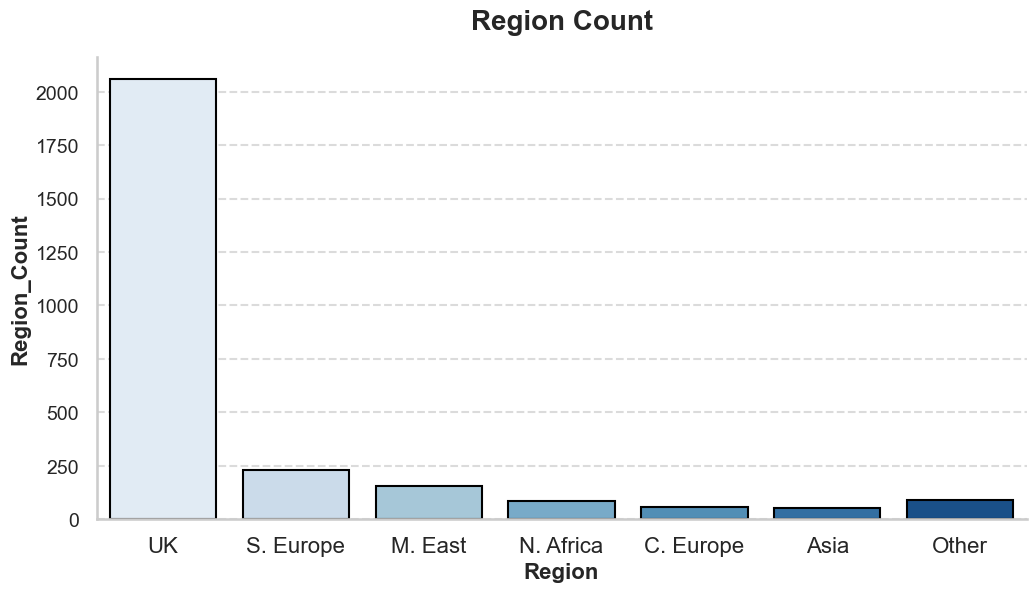

In [321]:
df_region.loc[df_region["Region_Count"] < 27, "Region"] = "Other"
df_region = df_region.groupby("Region", as_index=False)["Region_Count"].sum()
df_region_sorted = df_region[df_region["Region"] != "Other"].sort_values(by="Region_Count", ascending=False)

if "Other" in df_region["Region"].values:
    df_region_sorted = pd.concat([df_region_sorted, df_region[df_region["Region"] == "Other"]], ignore_index=True)

reg_fig, reg_ax = plot_bar_chart(df_region_sorted, "Region", "Region_Count", title="Region Count")

In [147]:
df_country.loc[df_country["Country_Count"] < 27, "Country"] = "Other"
df_country = df_country.groupby("Country", as_index=False)["Country_Count"].sum()
df_country_sorted = df_country[df_country["Country"] != "Other"].sort_values(by="Country_Count", ascending=False)

if "Other" in df_country["Country"].values:
    df_country_sorted = pd.concat([df_country_sorted, df_country[df_country["Country"] == "Other"]])

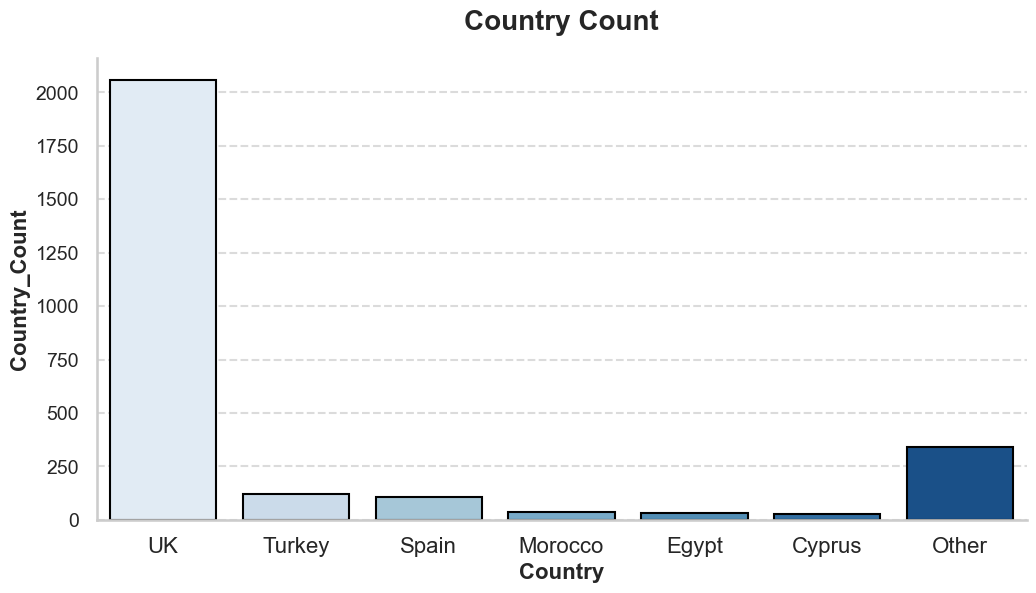

In [322]:
country_fig, country_ax = plot_bar_chart(df_country_sorted, "Country", "Country_Count", title="Country Count")

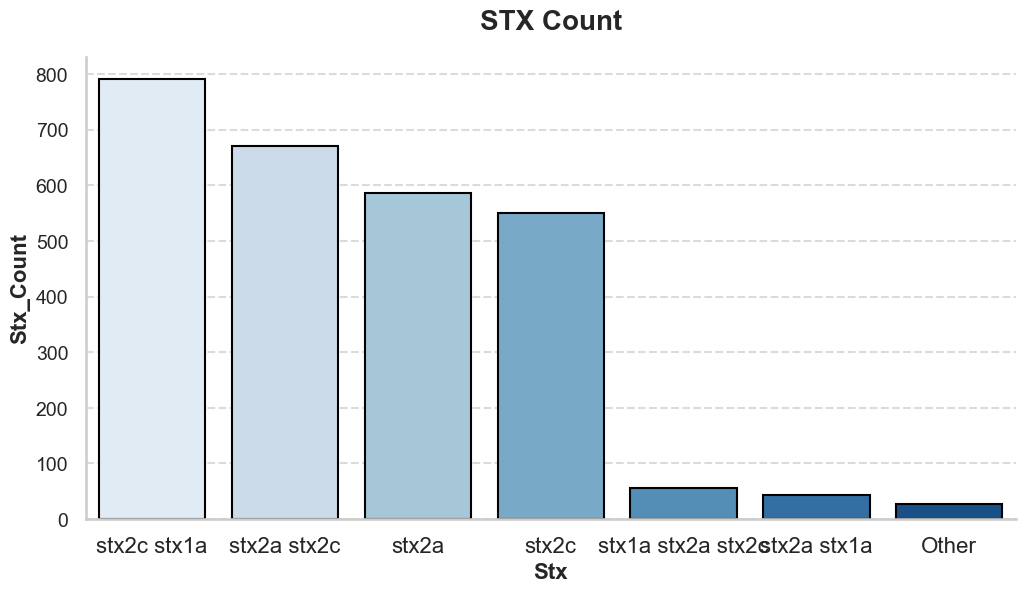

In [323]:
df_stx.loc[df_stx["Stx_Count"] < 27, "Stx"] = "Other"
df_stx = df_stx.groupby("Stx", as_index=False)["Stx_Count"].sum()
df_stx_sorted = df_stx[df_stx["Stx"] != "Other"].sort_values(by="Stx_Count", ascending=False)

if "Stx" in df_stx.columns and "Other" in df_stx["Stx"].values:
    df_stx_sorted = pd.concat([df_stx_sorted, df_stx[df_stx["Stx"] == "Other"]], ignore_index=True)

stx_fig, stx_ax = plot_bar_chart(df_stx_sorted, "Stx", "Stx_Count", title="STX Count")

In [153]:
df_pt.loc[df_pt["PT_Count"] < 27, "PT"] = "Other"
df_pt = df_pt.groupby("PT", as_index=False) ["PT_Count"].sum()
df_pt_sorted = df_pt[df_pt["PT"] != "Other"].sort_values(by="PT_Count", ascending=False)

if "Other" in df_pt["PT"].values:
    df_pt_sorted = pd.concat([df_pt_sorted, df_pt[df_pt["PT"] == "Other"]])

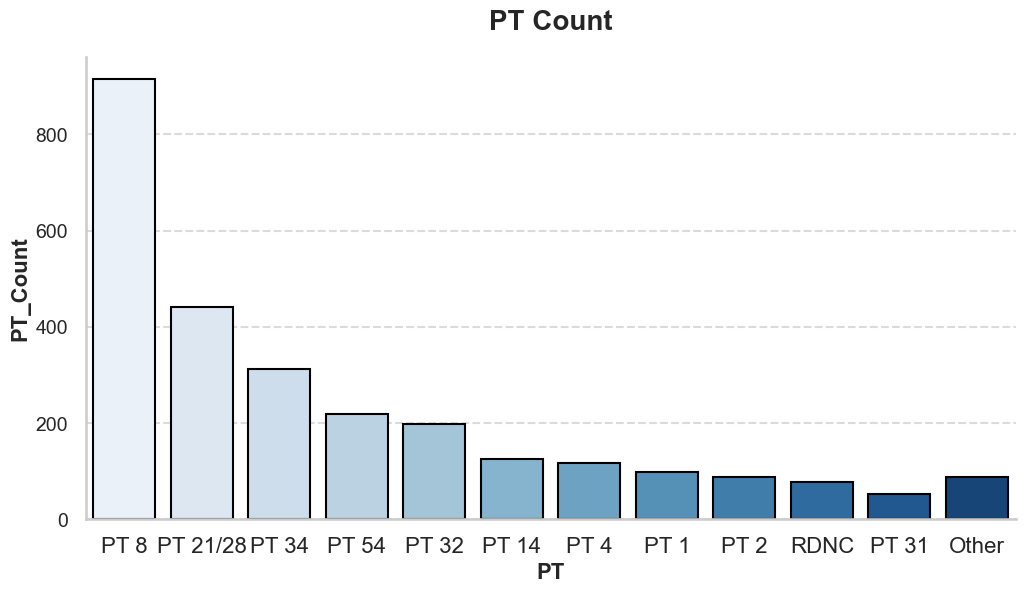

In [324]:
pt_fig, pt_ax = plot_bar_chart(df_pt_sorted, "PT", "PT_Count", title="PT Count")

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle("", fontsize=24, fontweight="bold", y=1.02)

title_fontsize = 16
label_fontsize = 17
tick_fontsize = 12
label_pad = 15

reg_fig, reg_ax = plot_bar_chart(df_region_sorted, "Region", "Region_Count", palette="coolwarm", ax=axes[0, 0])
reg_ax.set_title("Region-Wide Sample Distribution", fontsize=title_fontsize, fontweight="bold")
reg_ax.set_xlabel("Region", fontsize=label_fontsize, fontweight="bold", labelpad=label_pad) 
reg_ax.set_ylabel("Samples", fontsize=label_fontsize, labelpad=label_pad)
reg_ax.tick_params(axis="x", labelsize=tick_fontsize, rotation=0)
reg_ax.text(-0.1, 1.1, "A", transform=reg_ax.transAxes, fontsize=22, fontweight="bold", ha="center")

country_fig, country_ax = plot_bar_chart(df_country_sorted, "Country", "Country_Count", palette="coolwarm", ax=axes[0, 1])
country_ax.set_title("Country-Wide Sample Distribution", fontsize=title_fontsize, fontweight="bold")
country_ax.set_xlabel("Country", fontsize=label_fontsize, fontweight="bold", labelpad=label_pad)
country_ax.set_ylabel("Samples", fontsize=label_fontsize, labelpad=label_pad)
country_ax.tick_params(axis="x", labelsize=tick_fontsize, rotation=0)
country_ax.text(-0.1, 1.1, "B", transform=country_ax.transAxes, fontsize=22, fontweight="bold", ha="center")

stx_fig, stx_ax = plot_bar_chart(df_stx_sorted, "Stx", "Stx_Count", palette="coolwarm", ax=axes[1, 0])
stx_ax.set_title("Shiga Toxin Combination Distribution", fontsize=title_fontsize, fontweight="bold")
stx_ax.set_xlabel("Shiga Toxin", fontsize=label_fontsize, fontweight="bold", labelpad=label_pad)
stx_ax.set_ylabel("Samples", fontsize=label_fontsize, labelpad=label_pad)
stx_ax.tick_params(axis="x", labelsize=tick_fontsize, rotation=0)
stx_ax.text(-0.1, 1.1, "C", transform=stx_ax.transAxes, fontsize=22, fontweight="bold", ha="center")

pt_fig, pt_ax = plot_bar_chart(df_pt_sorted, "PT", "PT_Count", palette="coolwarm", ax=axes[1, 1])
pt_ax.set_title("Phage Type Sample Distribution", fontsize=title_fontsize, fontweight="bold")
pt_ax.set_xlabel("Phage Type", fontsize=label_fontsize, fontweight="bold", labelpad=label_pad)
pt_ax.set_ylabel("Samples", fontsize=label_fontsize, labelpad=label_pad)
pt_ax.tick_params(axis="x", labelsize=tick_fontsize, rotation=0)
pt_ax.text(-0.1, 1.1, "D", transform=pt_ax.transAxes, fontsize=22, fontweight="bold", ha="center")

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.savefig("bar_charts.png", dpi=300, bbox_inches="tight")
plt.show()

def plot_heatmap(df, index_col, columns_col, values_col, agg_func="sum", cmap="coolwarm_r", title="", figsize=(18, 12)):
    heatmap_data = df.pivot_table(index=columns_col, columns=index_col, values=values_col, aggfunc=agg_func, fill_value=0)

    row_sums = heatmap_data.sum(axis=1).sort_values(ascending=False).index  
    col_sums = heatmap_data.sum(axis=0).sort_values(ascending=False).index 
    heatmap_data = heatmap_data.loc[row_sums, col_sums]  

    fig, ax = plt.subplots(figsize=figsize)

    sns.heatmap(
        heatmap_data,
        cmap="coolwarm",
        annot=True, 
        fmt="d",
        linewidths=0.5,
        linecolor="white",
        cbar_kws={"label": "Frequency", "shrink": 0.7},
        xticklabels=True,
        yticklabels=True,
        cbar=True,
        ax=ax,
        annot_kws={"size": 14}  
    )

    ax.set_title(title, fontsize=24, fontweight="bold", pad=30)
    ax.set_xlabel("Shiga Toxins", fontsize=18, fontweight="bold", labelpad=20)
    ax.set_ylabel("Phage Types", fontsize=18, fontweight="bold", labelpad=20)
    ax.tick_params(axis="x", labelsize=14, rotation=45, which="major", pad=10)
    ax.tick_params(axis="y", labelsize=14, which="major", pad=10)

    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=14)

    ax.hlines(np.arange(1, heatmap_data.shape[0]), *ax.get_xlim(), colors="white", linewidth=0.2)
    ax.vlines(np.arange(1, heatmap_data.shape[1]), *ax.get_ylim(), colors="white", linewidth=0.2)

    plt.savefig("heatmap_stx_pt.png", dpi=300, bbox_inches="tight")
    plt.show()

In [181]:
df2 = read_file("~/Desktop/BH_analysis/Counts/final_stx_pt_cluster.csv")

In [182]:
df2

,Stx,Stx_Count,PT,PT_Count
0,stx2a,1,PT 70,1
1,stx1a,1,PT 1,1
2,stx2c,1,PT 42,1
3,stx2c,1,PT 87,1
4,stx2c stx1a,1,PT 2,1
...,...,...,...,...
96,stx2a,169,PT 21/28,169
97,stx2a,170,PT 8,170
98,stx2a stx2c,205,PT 34,205
99,stx2a stx2c,260,PT 21/28,260


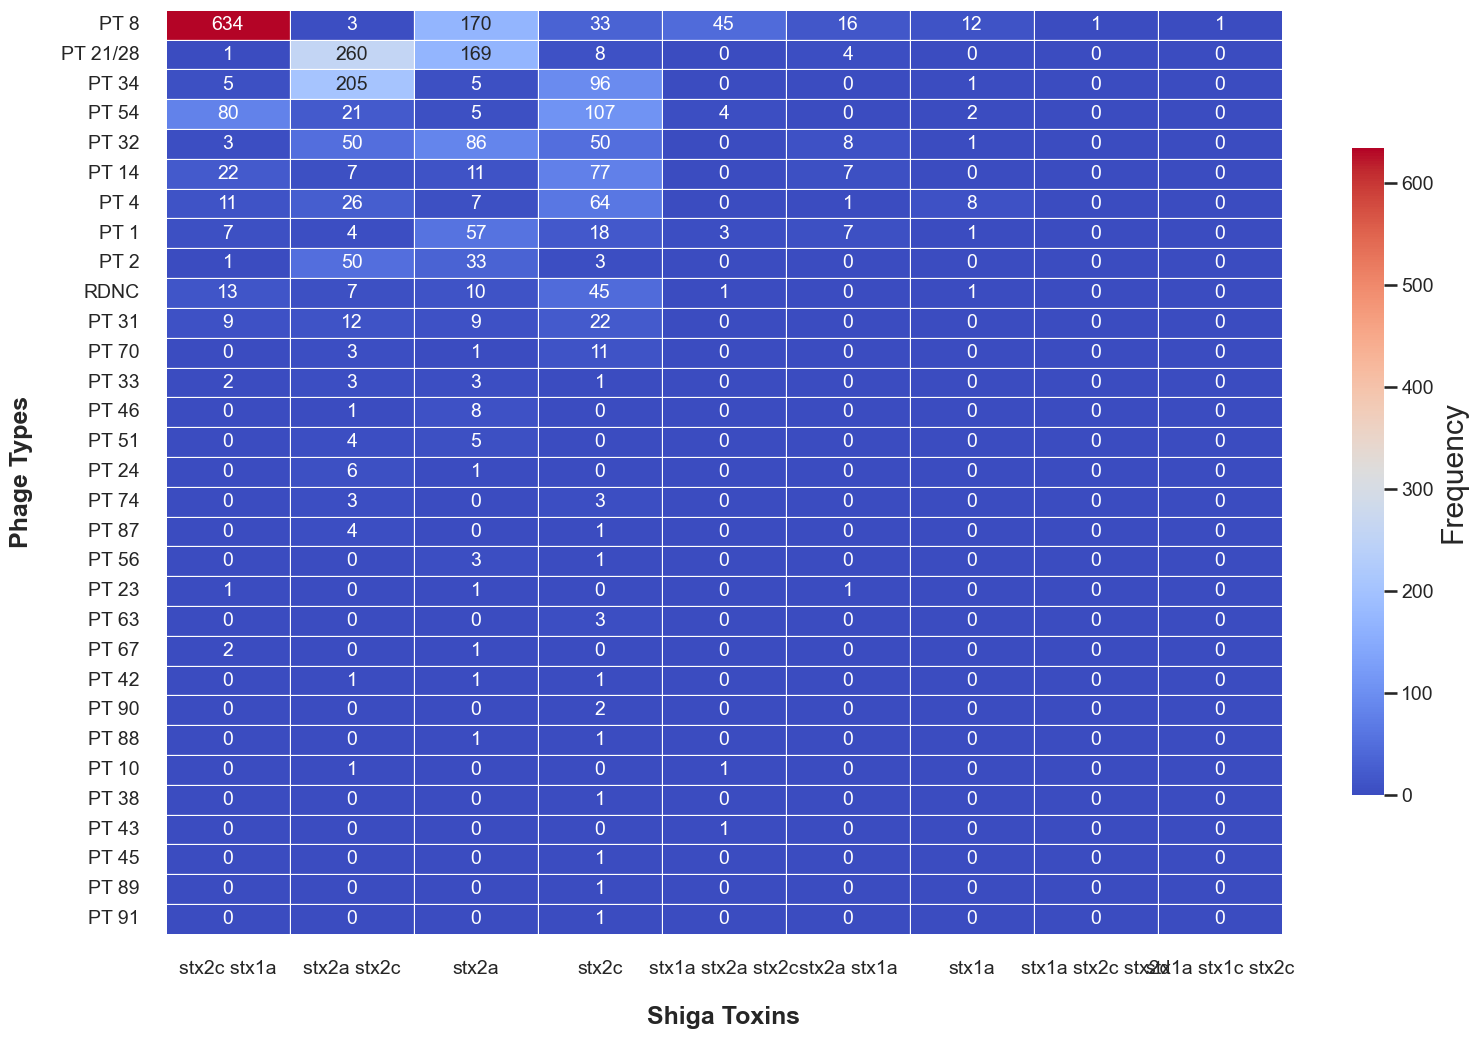

In [374]:
plot_heatmap(df2, index_col="Stx", columns_col="PT", values_col="Stx_Count")

In [208]:
df3 = read_file("~/Desktop/BH_analysis/Counts/uk_samples.csv")
df4 = read_file("~/Desktop/BH_analysis/Counts/non_uk.csv")

In [211]:
df3["Stx_Count"].sum() # good = UK 

2059

In [212]:
df4["Stx_Count"].sum() # good = non_uk

668